# Part 2 EXERCISES: 

The following tasks and exercises should be individually solved by all students. A jupyter notebook Python code with solutions should be uploaded to the digital campus ATENEA before next laboratory session. 

### Task 1: 
Download a RGB color image from the web ans save it to your working directory

### Task 2: 

Load the image in Python and answer the following questions:

    a) How many pixels are there in the image?
    b) How many channels, rows and columns?
    c) What is the format in which each pixel is encoded (number of bits)? 
    d) How may pixels are need in order to encode the whole image? 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


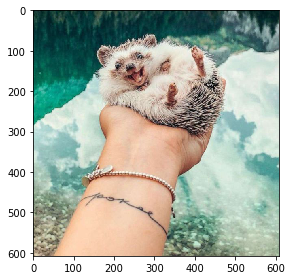

In [ ]:
import skimage as sk # load skimage libraries
from skimage.io import imread
IC = sk.io.imread('/content/image1.jpg') # read image using imread function
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 

In [ ]:
IC.shape[0]*IC.shape[1] # number of pixels

369664

In [ ]:
IC.shape # number of rows, columns and channels, respectively

(608, 608, 3)

In [ ]:
IC.dtype # format in which each pixel is encoded

dtype('uint8')

**Answers for Task 2**

In [ ]:
print("a) There are {} pixels in the image. \nb) There are {} rows, {} columns and {} channels. ".format(IC.shape[0]*IC.shape[1], IC.shape[0], IC.shape[1], IC.shape[2] ))
print("c) {} is the format in which each pixel is encoded. Therefore, as 'uint8' stands for unsigned integer of \
8 bits, each pixel in the image is encoded \n   with 8 bits representing an integer in the range [0,255].".format(IC.dtype))
print("d) In order to encode the whole image, {} pixels are needed.".format(IC.shape[0]*IC.shape[1]*3))

a) There are 369664 pixels in the image. 
b) There are 608 rows, 608 columns and 3 channels. 
c) uint8 is the format in which each pixel is encoded. Therefore, as 'uint8' stands for unsigned integer of 8 bits, each pixel in the image is encoded 
   with 8 bits representing an integer in the range [0,255].
d) In order to encode the whole image, 1108992 pixels are needed.


### Task 3: 

Convert the color image to grayscale and answer the questions: 

    a) How many pixels of the image have a grayscale level equal zero? 
    b) What is the total fracion of zero-valued pixels in the image?

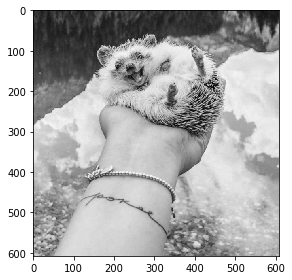

In [ ]:
IG = sk.color.rgb2gray(IC)
sk.io.imshow(IG)

In [ ]:
IG.shape

(608, 608)

In [ ]:
IG[IG==0].shape

(0,)

In [ ]:
p0=IG[IG==0].shape[0]/(IG.shape[0]*IG.shape[1])

NameError: ignored

**Answers for Task 3:**

In [ ]:
print("There are {} pixels that have a grayscale level equal to 0.".format(IG[IG==0].shape[0]))
print("Therefore, {} is the total fraction of zero-valued pixels in the image.".format(p0))

There are 0 pixels that have a grayscale level equal to 0.
Therefore, 0.0 is the total fraction of zero-valued pixels in the image.


### Task 4: 

Compare the following two approaches to convert the color image to grayscale: 

    Approach 1: Using the skimage function sk.color.rgb2gray ans in the example above. 
    Approach 2: Applyting the transformation $IG = 0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B$ 
where R,G and B are the Red, Green and Blue color channels of the image.

Are both results completly equivalent? Explain. 

In [ ]:
# Approach 1
IG = sk.color.rgb2gray(IC)

In [ ]:
# Approach 2
IG_manual = (0.2125*IC[:,:,0]+0.7154*IC[:,:,1]+0.0721*IC[:,:,2])/255 # convert to grayscale

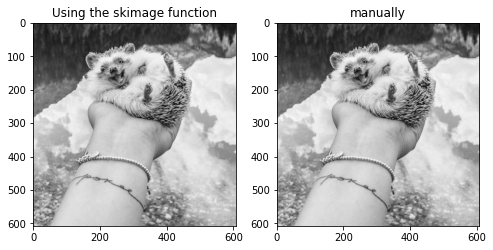

-1.5660866700684117e-12

In [ ]:
# Image display comparison
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(IG, cmap='gray')
ax[0].set_title('Using the skimage function')
ax[1].imshow(IG_manual, cmap='gray')
ax[1].set_title('manually')
plt.show()

import numpy as np
np.sum(IG-IG_manual)

**Answer for Task 4:**
The two approaches seen above do not result **completly** equivalent, as we can observe that the difference between both arrays is not an exact 0.0. 
Nevertheless, the discrepance is such small that we can consider that both methods are equivalent, as, for the human eye, the differences in the displayed images are not noticiable.

### Task 5: 

Create a figure arranged in 1 columns and 3 rows with each panel represents the histogram of each color channel of the color image. Each panel should have a subtitle and the axis should be properly labeled. 

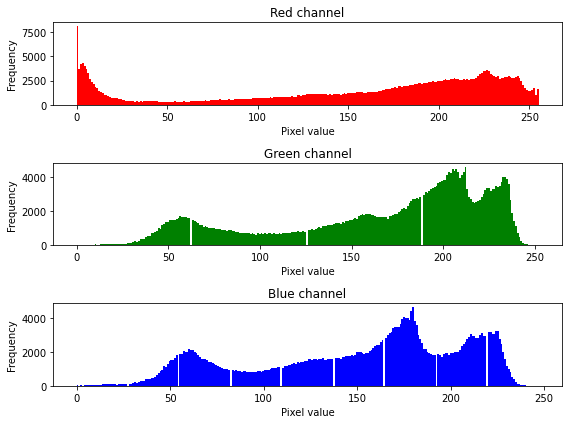

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# Get color channel data and convert axes to a 1d array
red = IC[:,:,0].ravel()
green = IC[:,:,1].ravel()
blue = IC[:,:,2].ravel()

# Set the spacial disposition and size
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(8,6))

# Plot some data and set titles and axes labels
ax[0].hist(red, bins=256,color='red')
ax[0].set_title('Red channel')
ax[0].set_xlabel('Pixel value')
ax[0].set_ylabel('Frequency')

ax[1].hist(green, bins=256,color='green')
ax[1].set_title('Green channel')
ax[1].set_xlabel('Pixel value')
ax[1].set_ylabel('Frequency')

ax[2].hist(blue, bins=256,color='blue')
ax[2].set_title('Blue channel')
ax[2].set_xlabel('Pixel value')
ax[2].set_ylabel('Frequency')

# Prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

### Task 6: 
Represent the cummulative probability distribution of the grayscale image and indicate which is the median pixel value. Make sure the axis are properly labeled in the figure. 

In [ ]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

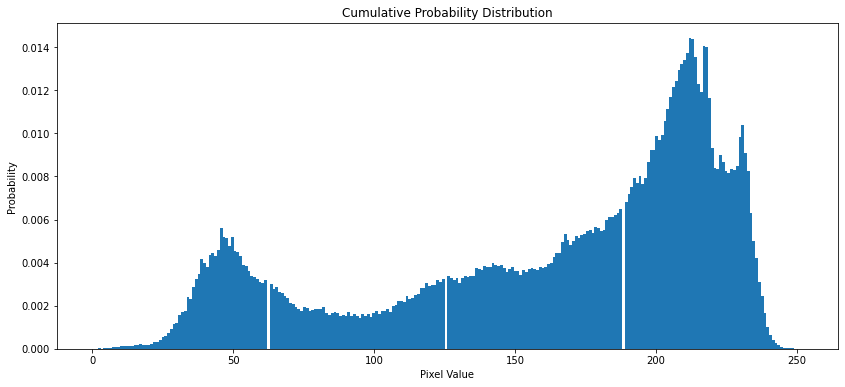

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=True)

# Titles and axis
plt.title('Cumulative Probability Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Probability')

plt.show()

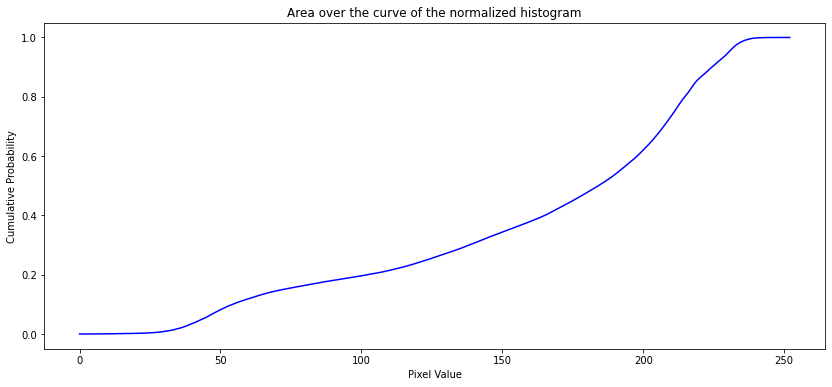

In [ ]:
from skimage import exposure

img_cdf, bins = exposure.cumulative_distribution(IGB, 255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins,img_cdf,'b')

# Titles and axis
plt.title('Area over the curve of the normalized histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Probability')

plt.show()

### Task 7: 

Obtain the mean and standard deviation of the pixel values in the image

In [ ]:
print("Mean= {}.\nStandard deviation= {}.".format(np.mean(v),np.std(v)))

Mean= 162.56709606561634.
Standard deviation= 61.04885986233971.


### Task 8: 

Binarize the image by setting to one the pixels with a value larger or equal than the median and to zero the pixels below the median.

In [ ]:
# Calculate the median value of the image
median = np.median(v)

# Binarize the image
bin_img = np.where(IGB >= median, 1, 0)

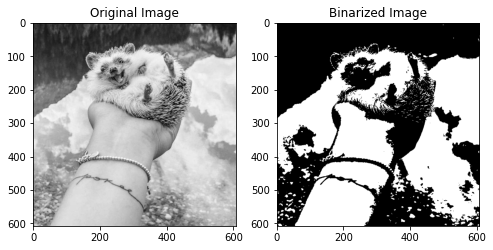

In [ ]:
# Display original and binarized images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(IGB, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(bin_img, cmap='gray')
ax[1].set_title('Binarized Image')
plt.show()

### Task 9: 

Export the figures in the report in 'png' format. 

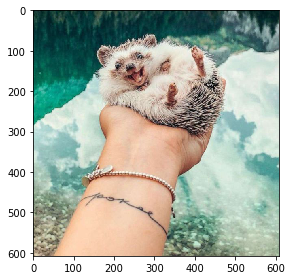

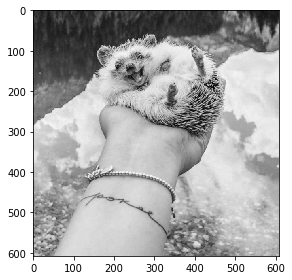

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


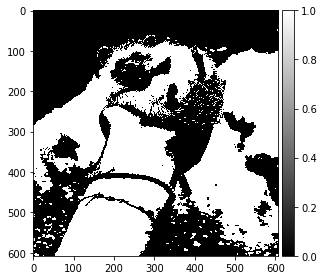

<ipython-input-142-bfa8378f8dc6>:14: UserWarning: bin_hedgehog.png is a low contrast image
  sk.io.imsave('bin_hedgehog.png', bin_img)


In [ ]:
# Original image
sk.io.imshow(IC) 
sk.io.show()
sk.io.imsave('IG_hedgehog.png', IC)

# Grayscale image
sk.io.imshow(IG)
sk.io.show()
sk.io.imsave('IG_hedgehog.png', IG)

# Binarized image
sk.io.imshow(bin_img, cmap='gray')
sk.io.show()
sk.io.imsave('bin_hedgehog.png', bin_img)

### Task 10:  
Provide a list of 10 new different things that you have learned after following this tutorial. 

In this tutorial, I have leart almost EVERYTHING, as it is the first time I handle with images in Python. A list of the 10 most important things I have learnt is gathered below:

*   Import and visualize any image
*   Calculate how many pixels it has
*   Discover that "uint8" means the the format in which each pixel (in this particular case), is encoded.
*   Learn how to represent a histogram of each color channel of a color image.
*   Convert an image into grayscale.
*   Binarize an image
*   Access to a determinate value (eg. x) in an array (eg. a), using a[==x].
*   How to save an image in png format (or any).
*   Convert axes into a 1d array using .ravel() function.
*   Visualize multiple plots using ax ariable, which holds an array of 'i' 'Axes' objects that correspond to the subplots in a figure.




